# Homework 2

## Item-10

### Implement a Random Forest

#### Objective:
Train a forest using scikit-learn on the original Fatigue data set
#### Steps:
* Read the dataset
* Train your regressor (not classifier)
* Predict for validation dataset and compute RMSE for training and validation
dataset as a function of number of trees

In [1]:
import pandas as pd 
import numpy as np
import os

In [2]:
# Load the Fatigue dataset
base_path = r"/Users/ayberkkutlu/Desktop/Machine-Learning-Course-and-Project/"

data_path = os.path.join(base_path, "Data/external/Fatigue_data.csv")
df=pd.read_csv(data_path).copy()
df.head()

,Sl. No.,NT,THT,THt,THQCr,CT,Ct,DT,Dt,QmT,...,S,Ni,Cr,Cu,Mo,RedRatio,dA,dB,dC,Fatigue
0,1,885,30,0,0,30,0.0,30.0,0.0,30,...,0.022,0.01,0.02,0.01,0.0,825,0.07,0.02,0.04,232
1,2,885,30,0,0,30,0.0,30.0,0.0,30,...,0.017,0.08,0.12,0.08,0.0,610,0.11,0.00,0.04,235
2,3,885,30,0,0,30,0.0,30.0,0.0,30,...,0.015,0.02,0.03,0.01,0.0,1270,0.07,0.02,0.00,235
3,4,885,30,0,0,30,0.0,30.0,0.0,30,...,0.024,0.01,0.02,0.01,0.0,1740,0.06,0.00,0.00,241
4,5,885,30,0,0,30,0.0,30.0,0.0,30,...,0.022,0.01,0.02,0.02,0.0,825,0.04,0.02,0.00,225


In [3]:
target='Fatigue'
X = df.drop(columns=['Sl. No.', target]).copy()
y = df[target].copy()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [5]:
# Split Data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=2)

In [6]:
# Range of trees to test
n_trees_range = [1, 2, 4, 8, 16, 32, 64, 128, 256]

# Store results
train_rmses = []
val_rmses = []


print(f"{'Trees':<10}  {'Train RMSE':<15}  {'Val RMSE':<15}")

# Loop over different number of trees
for n_trees in n_trees_range:
    # Initialize Regressor
    rf = RandomForestRegressor(
        n_estimators=n_trees,
        random_state=2,
        n_jobs=-1  
    )
    
    # Train
    rf.fit(X_train, y_train)
    
    # Predict
    y_train_pred = rf.predict(X_train)
    y_val_pred = rf.predict(X_val)
    
    # Compute RMSE
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
    
    # Store results
    train_rmses.append(rmse_train)
    val_rmses.append(rmse_val)
    
    print(f"{n_trees:<10}  {rmse_train:<15.4f}  {rmse_val:<15.4f}")

Trees       Train RMSE       Val RMSE       
1           27.6219          31.5652        
2           19.7205          28.7340        
4           15.9793          28.4509        
8           13.5898          27.9023        
16          11.8532          27.3904        
32          11.2787          25.9670        
64          10.8548          25.8434        
128         10.6127          25.2198        
256         10.5183          25.3630        


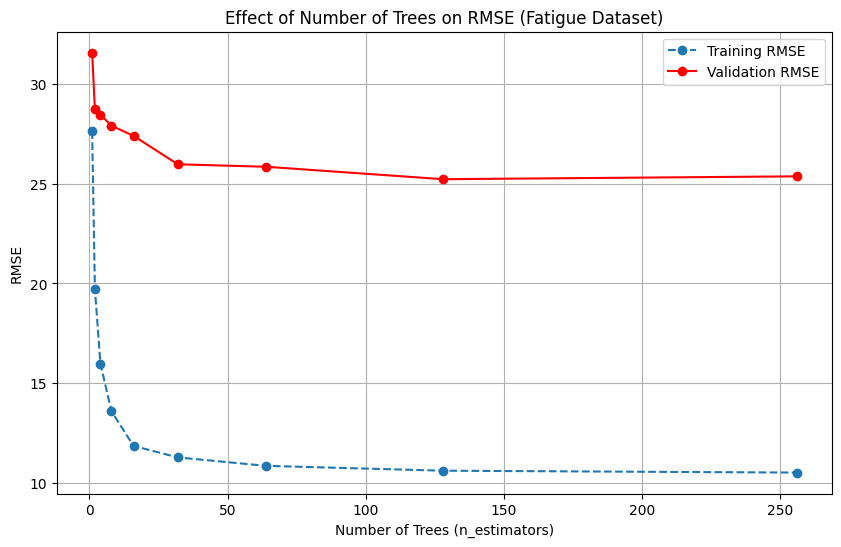

In [7]:
# Visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(n_trees_range, train_rmses, label='Training RMSE', marker='o', linestyle='--')
plt.plot(n_trees_range, val_rmses, label='Validation RMSE', marker='o', color='red')

plt.title('Effect of Number of Trees on RMSE (Fatigue Dataset)')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.show()

## Item-11

### Implement Gradient Boosting

#### Objective:
Train a forest using scikit-learn and xgboost on the “Fatigue” (good vs. bad) data
set
#### Steps:
* Read the dataset
* Train your classifier and analyze parameters
* Compute AUC score for different parameters

In [8]:
# Prepare X and y
X = df.drop(columns=['Sl. No.', target]).copy()
y_reg = df[target].to_numpy()
y = (y_reg > 500).astype(int)     # 1=Good Fatigue Life, 0=Bad

pd.Series(y).value_counts()

1    233
0    204
Name: count, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

In [ ]:
# We will test how Learning Rate affects AUC for both libraries
learning_rates = [0.01, 0.05, 0.1, 0.2, 0.5]
results = []

print(f"{'Library':<10}  {'LR':<5}  {'AUC Score':<10}")

# Gradient Boosting Classifier (Sklearn)
for lr in learning_rates:
    # Initialize
    gb_clf = GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=lr,
        max_depth=3,
        random_state=42
    )
    
    # Train
    gb_clf.fit(X_train, y_train)
    
    # Predict Probability (AUC requires probabilities, not hard class labels)
    y_pred_proba = gb_clf.predict_proba(X_test)[:, 1]
    
    # Score
    auc = roc_auc_score(y_test, y_pred_proba)
    results.append({'Library': 'Sklearn', 'LR': lr, 'AUC': auc})
    print(f"{'Sklearn':<10}  {lr:<5}  {auc:.4f}")


# Xgboost Classifier
for lr in learning_rates:
    # Initialize
    xgb_clf = XGBClassifier(
        n_estimators=100,
        learning_rate=lr,
        max_depth=3,
        eval_metric='logloss',
        random_state=42
    )
    
    # Train
    xgb_clf.fit(X_train, y_train)
    
    # Predict Probability
    y_pred_proba = xgb_clf.predict_proba(X_test)[:, 1]
    
    # Score
    auc = roc_auc_score(y_test, y_pred_proba)
    results.append({'Library': 'XGBoost', 'LR': lr, 'AUC': auc})
    print(f"{'XGBoost':<10}  {lr:<5}  {auc:.4f}")

Library     LR     AUC Score 
Sklearn     0.01   0.9744
Sklearn     0.05   0.9799
Sklearn     0.1    0.9819
Sklearn     0.2    0.9814
Sklearn     0.5    0.9809
XGBoost     0.01   0.9734
XGBoost     0.05   0.9855
XGBoost     0.1    0.9892
XGBoost     0.2    0.9886
XGBoost     0.5    0.9866


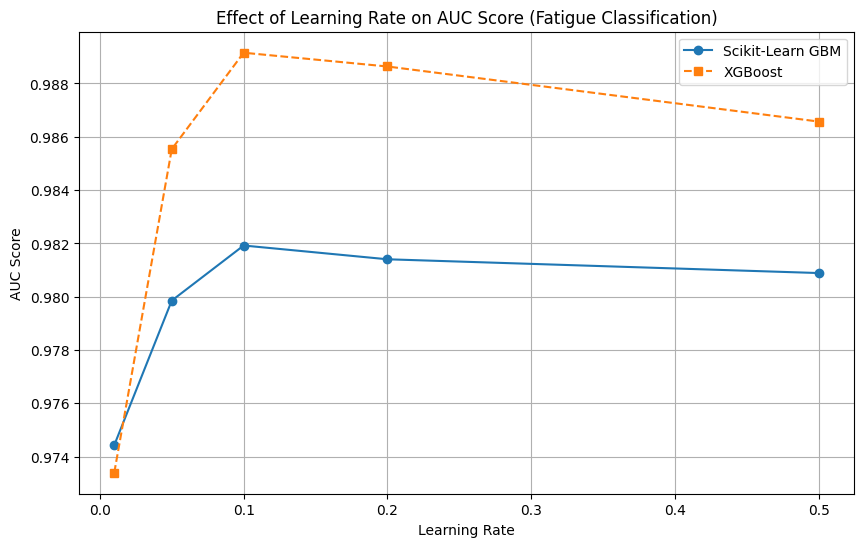

In [17]:
# Visualization
results_df = pd.DataFrame(results)

plt.figure(figsize=(10, 6))

# Plot Sklearn
sk_data = results_df[results_df['Library'] == 'Sklearn']
plt.plot(sk_data['LR'], sk_data['AUC'], marker='o', label='Scikit-Learn GBM')

# Plot XGBoost
xgb_data = results_df[results_df['Library'] == 'XGBoost']
plt.plot(xgb_data['LR'], xgb_data['AUC'], marker='s', linestyle='--', label='XGBoost')

plt.title('Effect of Learning Rate on AUC Score (Fatigue Classification)')
plt.xlabel('Learning Rate')
plt.ylabel('AUC Score')
plt.legend()
plt.grid(True)
plt.show()

## Item-12

### Implement Image Classification

#### Objective:
Train a neural network on the atomagined dataset and use it for classification
#### Steps:
* Download/read the dataset and read its documentation
* Remove one (or a few) of the images for later prediction
* Use your model for classification of one of the images from
the dataset, e.g. for “symmetry_space_group_name” or
“symmetry_Int_Tables_number”
* Train and validate your model (follow the example
notebook)
* Predict